## Final Phase 4 Project Submission

Please fill out:
* Student name: Mika Wambua Benson
* Student pace: part-time
* Scheduled project review date/time: 12/2/2025
* Instructor name: Samuel Karu
* Blog post URL: 

In [1]:
import pandas as pd
# importing relevant libraries
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import SVD, KNNWithMeans, KNNBasic, KNNBaseline
# from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
# from surprise.model_selection import GridSearchCV
import numpy as np
from surprise import accuracy
from surprise import Dataset, Reader

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# The following will improve the default style and the font sizes of the chart
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [2]:

# Load the ratings data
ratings_df = pd.read_csv('ratings.csv')

# Display the first few rows of the dataset
print(ratings_df.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [3]:
ratings_df = ratings_df.drop(columns=['timestamp'], axis=1)

In [4]:
ratings_df.shape

(100836, 3)

In [5]:

# Load the movies data
movies_df = pd.read_csv('movies.csv')

# Display the first few rows of the dataset
movies_df.head()

# we should be having our recommendation systems having similar genres

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:

# Merge ratings with movie titles
movie_ratings_df = pd.merge(ratings_df, movies_df, on="movieId")

# Display the first few rows of the merged dataset
movie_ratings_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
movie_ratings_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
# lets check for any duplicates 
print("Number of Duplicates:", movie_ratings_df.duplicated().sum())

Number of Duplicates: 0


In [9]:
# check for unique values in the genres column
print('Unique genres')
print(movie_ratings_df['genres'].unique())

Unique genres
['Adventure|Animation|Children|Comedy|Fantasy' 'Comedy|Romance'
 'Action|Crime|Thriller' 'Mystery|Thriller' 'Crime|Mystery|Thriller'
 'Action|Comedy|Horror|Thriller' 'Adventure|Comedy|Crime|Romance'
 'Action|Drama|War' 'Action|Drama|Romance|War' 'Comedy|War'
 'Action|Romance|Western' 'Comedy' 'Adventure|Comedy' 'Comedy|Drama'
 'Action|Adventure|Sci-Fi' 'Comedy|Crime|Drama|Thriller'
 'Action|Crime|Drama|Thriller' 'Comedy|Drama|Romance|War'
 'Adventure|Children|Romance' 'Action|Comedy|Crime|Fantasy'
 'Action|Thriller' 'Thriller' 'Action|Adventure|Sci-Fi|Thriller'
 'Drama|War' 'Comedy|Romance|Thriller' 'Action|Adventure|Comedy|Romance'
 'Action|Drama|Western' 'Adventure|Drama|Western' 'Crime|Horror|Thriller'
 'Animation|Children|Fantasy|Musical' 'Action|Adventure|Mystery|Thriller'
 'Adventure|Animation|Children|Fantasy|Musical'
 'Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi'
 'Action|Adventure|Thriller' 'Action|Adventure|Romance|Thriller'
 'Adventure|Children|Fantasy|M

In [10]:
genres_split = movie_ratings_df['genres'].str.split('|').str[0]

# concatenate the new columns with the movie_ratings_df
movie_ratings_df = pd.concat([movie_ratings_df, genres_split], axis = 1)

# lets drop the original column with the genres
movie_ratings_df = movie_ratings_df.drop(columns = ['genres'])
movie_ratings_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [11]:
# lets save a cleaned dataset to new csv file 
movie_ratings_df.to_csv('cleaned_movie_ratings.csv', index = False)

In [12]:
movie_analysis_df = pd.read_csv('cleaned_movie_ratings.csv')
movie_analysis_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [13]:
top_movies = movie_analysis_df.groupby('title')['rating'].mean().reset_index()
top_movies = top_movies.sort_values(by='rating', ascending=False)
print(top_movies.head(10))  # Top 10 highest-rated movies


                                          title  rating
3354                  Gena the Crocodile (1969)     5.0
8951                        True Stories (1986)     5.0
1986              Cosmic Scrat-tastrophe (2015)     5.0
5269                    Love and Pigeons (1985)     5.0
7033        Red Sorghum (Hong gao liang) (1987)     5.0
8661  Thin Line Between Love and Hate, A (1996)     5.0
5019                        Lesson Faust (1994)     5.0
2799                                 Eva (2011)     5.0
9435             Who Killed Chea Vichea? (2010)     5.0
7662                         Siam Sunset (1999)     5.0


In [14]:
movie_analysis_df.groupby('title')['rating'].count().sort_values(ascending = False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(movie_analysis_df.groupby('title')['rating'].mean())
ratings

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [16]:
ratings['num_ratings'] = pd.DataFrame(movie_analysis_df.groupby('title')['rating'].count())
print(ratings)

                                             rating  num_ratings
title                                                           
'71 (2014)                                 4.000000            1
'Hellboy': The Seeds of Creation (2004)    4.000000            1
'Round Midnight (1986)                     3.500000            2
'Salem's Lot (2004)                        5.000000            1
'Til There Was You (1997)                  4.000000            2
...                                             ...          ...
eXistenZ (1999)                            3.863636           22
xXx (2002)                                 2.770833           24
xXx: State of the Union (2005)             2.000000            5
¡Three Amigos! (1986)                      3.134615           26
À nous la liberté (Freedom for Us) (1931)  1.000000            1

[9719 rows x 2 columns]


<Axes: >

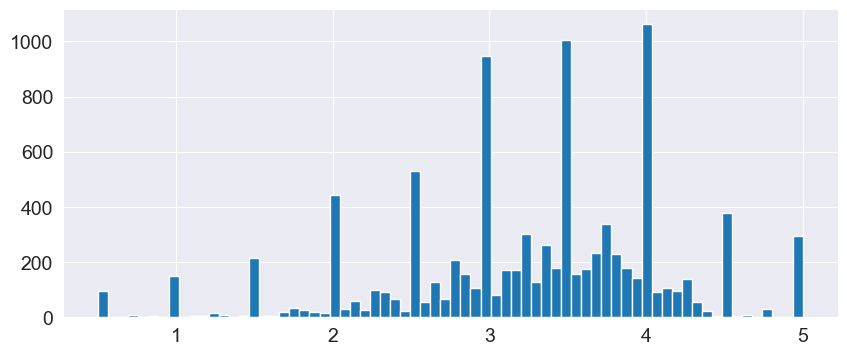

In [17]:
plt.figure(figsize = (10, 4))
ratings['rating'].hist(bins = 70)

In [18]:
ratings = pd.DataFrame(movie_analysis_df.groupby('title')['rating'].count()).reset_index().head(20)
fig = px.bar(ratings, x = 'title', y = 'rating', title = 'Number of Ratings based on the Movie Title',
             labels = {'ratings': 'Number of Ratings', 'title': 'Movie Title'})
fig.show()

In [20]:
# sns.jointplot(x = 'rating', y = 'num_ratings', data = ratings, alpha = .5)

In [ ]:
# If you see a dense cluster in a particular area, it means that many movies fall within that range of ratings and review counts

# If highly-rated movies also have a high number of ratings, it suggests that popular movies tend to be well-liked.

# If there are highly-rated movies with very few ratings, these could be hidden gems—great movies that not many people have seen.

In [60]:
# Select Top 10 Movies
top_10_movies = top_movies.head(10)

# Create Bar Chart
fig = px.bar(
    top_10_movies, 
    x='rating', 
    y='title', 
    orientation='h',  # Horizontal bars for better readability
    title="Top 10 Highest-Rated Movies",
    labels={'rating': 'Average Rating', 'title': 'Movie Title'},
    color='rating',  # Color based on rating
    color_continuous_scale='blues'  # Color theme
)

# Reverse the Y-axis to display highest-rated movies at the top
fig.update_layout(yaxis={'categoryorder': 'total ascending'})

# Show the interactive plot
fig.show()


In [68]:
movie_analysis_df['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [21]:
# Define the rating scale (e.g., 0.5 to 5.0)
reader = Reader(rating_scale=(0.5, 5.0))

# Convert the DataFrame to a Surprise dataset
data = Dataset.load_from_df(movie_analysis_df[["userId", "movieId", "rating"]], reader)
data

In [22]:
dataset = data.build_full_trainset()
print('Number of Users: ', dataset.n_users, '\n')

print('Number of items: ', dataset.n_items)


# By considering the neighborhood-based methods use the majority.. the higher number of users or items
# hence use the item Based Recommender system

Number of Users:  610 

Number of items:  9724


In [23]:
# Split the dataset
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Building the Item-Based Collaborative Filtering Model

In this step, we will build the recommendation model using **item-based collaborative filtering**. This approach recommends items (movies) based on the similarities between them.

In [24]:
# perform the grid search with SVD..
grid_params = {'n_factors': [20, 50, 100],
               'reg_all': [0.02, 0.05, 0.1]}

g_s_svd = GridSearchCV(SVD, param_grid = grid_params, n_jobs = -1)

# fit the model 
g_s_svd.fit(data)

In [25]:
# print out optimal parameters for SVD after GridSearch
print(g_s_svd.best_params)
# print(g_s_svd.best_score)

# 'n_factors': 20: The number of latent factors in the factorization model. Latent factors are features extracted from 
# the data that represent underlying patterns.
# 'reg_all': 0.02: The regularization term to prevent overfitting by penalizing large coefficients.

# The RMSE value for the model indicates that the std of the residuals (predictions errors) for a lower value indicates a better fot

{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 20, 'reg_all': 0.02}}


# Making a Simple predictions using the SVD algorithms

In [26]:
svd = SVD(n_factors = 20, reg_all = 0.02)
svd.fit(dataset)

In [27]:
svd_pred_1 = svd.predict(2, 4)
svd_pred_1

# The predict method is used to predict the rating that a user 2 would give to an item 4
# 2 represents the user ID.
# 4 represents the item ID.


Prediction(uid=2, iid=4, r_ui=None, est=2.979493572509826, details={'was_impossible': False})

In [28]:
svd_pred_1[3]

2.979493572509826

In [29]:
knn_basic = KNNBasic(sim_options = {'name': 'pearson', 'user_based': False})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs = 1)

# for user_based: True indicates that the similarity would be computed between users

# for user_based: False indicates that the similarity would be computed between items

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [30]:
# here we print out the average RMSE for the test set
for i in cv_knn_basic.items():
    print(i)
    
print("-----")
print(np.mean(cv_knn_basic['test_rmse']))

# ('test_rmse', array([0.9663111 , 0.97294905, 0.96383918, 0.97586395, 0.97072858]))
# these are the RMSE values obtained from each fold of the cross-validation. Lower values indicate better performance.

# 0.9699383727407497 this is the aggregated score the mean rmse across all the folds which provides a single value summarizing the performance of 
# the model

('test_rmse', array([0.97261739, 0.96769262, 0.96834509, 0.97186274, 0.96943162]))
('test_mae', array([0.75222023, 0.75376728, 0.7544442 , 0.75458931, 0.75344352]))
('fit_time', (40.518290758132935, 42.84374642372131, 39.393699169158936, 36.73753762245178, 37.94434094429016))
('test_time', (13.30243992805481, 19.07964324951172, 17.811278343200684, 13.165804624557495, 12.833606243133545))
-----
0.9699898898628223


In [34]:
mean_rmse_basic = np.mean(cv_knn_basic['test_rmse'])
mean_rmse_basic

0.9699898898628223

In [31]:
# cross validating with KNNBaseline
knn_base = KNNBaseline(sim_options = {'name':'pearson', 'user_based': False})

cv_knn_base = cross_validate(knn_base, data, n_jobs = 1)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [32]:
# print out the average score for the test set
mean_rmse_base = np.mean(cv_knn_base['test_rmse'])
mean_rmse_base

0.8789360739282855

In [35]:
# Compare the two and determine which has better performance
if mean_rmse_base < mean_rmse_basic:
    print("cv_knn_base has better performance.")
else:
    print("cv_knn_basic has better performance.")

cv_knn_base has better performance.


In [36]:
movie_analysis_df.groupby('title')['rating'].count().sort_values(ascending = False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [38]:
movie_analysis_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [41]:
movie_analysis_df['title'].value_counts()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Sex, Drugs & Taxation (2013)          1
Extraordinary Tales (2015)            1
Tomorrow (2015)                       1
Embrace of the Serpent (2016)         1
31 (2016)                             1
Name: count, Length: 9719, dtype: int64

In [42]:
def find_movie_id_by_title(movie_analysis_df, title):
    # Check if the title exists in the DataFrame
    if title in movie_analysis_df['title'].values:
        # Extract the movie ID
        movie_id = movie_analysis_df[movie_analysis_df['title'] == title]['movieId'].values[0]
        return movie_id
    else:
        return None

# Example usage
title = "Matrix, The (1999)"  # Replace with the actual movie title you are searching for
movie_id = find_movie_id_by_title(movie_analysis_df, title)
print(f"The movie ID for the title '{title}' is {movie_id}")

The movie ID for the title 'Matrix, The (1999)' is 2571


## DRAFT 

In [61]:
from surprise import Dataset, Reader, KNNBasic
import pandas as pd

def get_similar_movies(movie_title, model, trainset, movies_df, top_n=5):
    """
    Find top N most similar movies to a given title based on collaborative filtering.

    Parameters:
        movie_title (str): The title of the movie to find similar movies for.
        model (KNNBasic): A trained KNN collaborative filtering model.
        trainset (surprise.Trainset): The dataset in Surprise's trainset format.
        movies_df (pd.DataFrame): DataFrame containing 'movieId' and 'title' columns.
        top_n (int): Number of similar movies to return.

    Returns:
        list: Titles of the top N most similar movies.
    """
    
    # Find the movie ID for the given title (handling case insensitivity)
    movie_id = movies_df[movies_df['title'].str.contains(movie_title, case=False, na=False, regex = False)]['movieId'].values

    if len(movie_id) == 0:
        return f"Movie '{movie_title}' not found in dataset."

    # Convert movieId to Surprise’s internal ID
    try:
        movie_inner_id = trainset.to_inner_iid(movie_id[0])
    except KeyError:
        return f"Movie '{movie_title}' not found in training set."

    # Get top-N most similar movies using the trained KNN model
    neighbors = model.get_neighbors(movie_inner_id, k=top_n)

    # Convert internal IDs back to movie IDs and retrieve titles
    similar_titles = [
        movies_df[movies_df['movieId'] == int(trainset.to_raw_iid(neighbor))]['title'].values[0]
        for neighbor in neighbors
    ]

    return similar_titles


In [62]:
# Define a Surprise Reader
reader = Reader(rating_scale=(0.5, 5.0))

# Load dataset into Surprise format
data = Dataset.load_from_df(movie_analysis_df[['userId', 'movieId', 'rating']], reader)

# Build the full training set
trainset = data.build_full_trainset()


In [65]:
# Define similarity options for KNN
sim_options = {
    "name": "pearson",  # Use cosine similarity
    "user_based": False  # Item-based collaborative filtering
}

# Train a KNN model
knn_model = KNNBasic(sim_options=sim_options)
knn_model.fit(trainset)


Computing the pearson similarity matrix...
Done computing similarity matrix.


In [67]:
movie_analysis_df['title']

0       Toy Story (1995)
1       Toy Story (1995)
2       Toy Story (1995)
3       Toy Story (1995)
4       Toy Story (1995)
5    Forrest Gump (1994)
6    Forrest Gump (1994)
7    Forrest Gump (1994)
8    Forrest Gump (1994)
9    Forrest Gump (1994)
Name: title, dtype: object

In [68]:
title = "Forrest Gump (1994))"  # Replace with your desired movie title
similar_movies = get_similar_movies(title, knn_model, trainset, movie_analysis_df, top_n=5)
print(similar_movies)


Movie 'Forrest Gump (1994))' not found in dataset.


In [ ]:
# Use regex=False to avoid interpreting special characters in the title
    movie_id = movies_df[movies_df['title'].str.contains(movie_title, case=False, na=False, regex=False)]['movieId'].values


 Collaborative Filtering (Using Surprise SVD)
This method finds movies that users who liked a given movie also liked.

Step 1: Train a Collaborative Filtering Model

In [51]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Define Reader to load ratings
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movie_analysis_df[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD model
svd = SVD()
svd.fit(trainset)


In [52]:
import numpy as np

def get_top_5_recommendations(movie_analysis_df, svd, title):
    # Get the movie ID for the given title
    movie_id = find_movie_id_by_title(movie_analysis_df, title)
    
    if movie_id is None:
        return f"Movie '{title}' not found in the dataset."
    
    # Get all unique movie IDs
    movie_ids = movie_analysis_df['movieId'].unique()
    
    # Predict ratings for all movies (excluding the selected movie)
    predictions = [(mid, svd.predict(uid=1, iid=mid).est) for mid in movie_ids if mid != movie_id]
    
    # Sort by predicted rating and get top 5
    top_5 = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]
    
    # Get movie titles for the recommended IDs
    recommended_movies = movie_analysis_df[movie_analysis_df['movieId'].isin([x[0] for x in top_5])][['movieId', 'title']].drop_duplicates()
    
    return recommended_movies

# Example usage
title = "Matrix, The (1999)"
recommendations = get_top_5_recommendations(movie_analysis_df, svd, title)
print(recommendations)


Movie 'Matrix, The (1999)' not found in the dataset.


In [53]:
def get_top_recommendation(movie_analysis_df, svd, title):
    # Get the movie ID for the given title
    movie_id = find_movie_id_by_title(movie_analysis_df, title)
    
    if movie_id is None:
        return f"Movie '{title}' not found in the dataset."
    
    # Get all unique movie IDs
    movie_ids = movie_analysis_df['movieId'].unique()
    
    # Predict ratings for all movies (excluding the selected movie)
    predictions = [(mid, svd.predict(uid=1, iid=mid).est) for mid in movie_ids if mid != movie_id]
    
    # Get the best-rated recommendation
    top_movie_id, top_rating = max(predictions, key=lambda x: x[1])

    # Retrieve the recommended movie title
    top_movie = movie_analysis_df[movie_analysis_df['movieId'] == top_movie_id][['title']].drop_duplicates().iloc[0, 0]

    return f"Top recommendation for '{title}' is: {top_movie}"

# Example usage
title = "Matrix, The (1999)"
top_recommendation = get_top_recommendation(movie_analysis_df, svd, title)
print(top_recommendation)


Movie 'Matrix, The (1999)' not found in the dataset.


In [ ]:
def get_similar_movies(movie_title, model, trainset, movies_df, top_n=5):
    # Find the movie ID for the given title
    movie_id = movies_df[movies_df['title'].str.contains(movie_title, case=False, na=False)]['movieId'].values

    # Convert the movieId to an internal ID used by Surprise (trainset)
    movie_inner_id = trainset.to_inner_iid(movie_id[0])

    # Get the top N most similar movies using the KNN model's get_neighbors function
    neighbors = model.get_neighbors(movie_inner_id, k=top_n)

    # Map internal IDs back to movie titles here is the list comprehension
    similar_titles = [(movies_df[movies_df['movieId'] == int(trainset.to_raw_iid(neighbor))]['title'].values[0])
                      for neighbor in neighbors]

    return similar_titles